# 数据读入模块

In [82]:
import pandas as pd



train_data = pd.read_csv("data\main\df_train_b1.csv", index_col=0)
test_data = pd.read_csv('data\main\df_test_b1.csv', index_col=0)


## 要读入除了main之外的数在此处添加

In [83]:
import os
filenames = ["data\detail\df_basic_b1.csv",
             "data\detail\df_corp_b1.csv",
             "data\detail\df_judicial_b1.csv",
             "data\detail\df_loan2_b1.csv",
             "data\detail\df_query_b1.csv"]
for filename in filenames:
    temp = pd.read_csv(filename)
    train_data = pd.merge(train_data, temp, on="cust_id",
                          how="left", suffixes=("", "_y"))
    test_data = pd.merge(test_data, temp, on="cust_id",
                         how="left", suffixes=("", "_y"))


In [84]:
train_data['is_judicial']=[0 if pd.isna(i) else 1 for i in train_data['judicial_reason']]
test_data['is_judicial']=[0 if pd.isna(i) else 1 for i in test_data['judicial_reason']]

In [85]:
train_data['nan_num']=(train_data==0).astype(int).sum(axis=1)
test_data['nan_num']=(test_data==0).astype(int).sum(axis=1)

In [86]:
import pandas as pd
temp_df = pd.read_csv("./data/detail/df_loan1_b1.csv")


def chuli_loan(df, colname, ways):
    cust_id = list(set(df['cust_id']))
    res_df = pd.DataFrame({'cust_id': cust_id})
    temp_train = pd.read_csv('./data/df_train.csv')
    temp_test = pd.read_csv('./data/df_test.csv')

    ways_1 = []
    temp = list(temp_test.columns)
    global train_data,test_data

    for i in ways:
        if (colname+'_'+i) not in temp:
            ways_1.append(i)
            res_df[colname+'_'+i] = None
        else:
            print(colname+'_'+i+'已存在')
            train_data = pd.merge(train_data, temp_train[['cust_id', colname+'_'+i]], on="cust_id",
                                  how="left", suffixes=("", "_y"))
            test_data = pd.merge(test_data, temp_test[['cust_id', colname+'_'+i]], on="cust_id",
                                 how="left", suffixes=("", "_y"))
    ways = ways_1
    if len(ways) == 0:
        return res_df
    for i in cust_id:
        cust_df = df[df['cust_id'] == i]
        if 'mean' in ways:
            x = cust_df[colname].mean()
            res_df.loc[i, colname+'_mean'] = x
        if 'sum' in ways:
            x = cust_df[colname].sum()
            res_df.loc[i, colname+'_sum'] = x
        if 'count' in ways:
            x = cust_df[colname].count()
            res_df.loc[i, colname+'_count'] = x
    return res_df


for colname in ['loan1_1', 'loan1_3', 'loan1_7', 'loan1_9']:
    df = chuli_loan(temp_df, colname, ('mean', 'sum', 'count'))
    train_data = pd.merge(train_data, df, on="cust_id",
                          how="left", suffixes=("", "_y"))
    test_data = pd.merge(test_data, df, on="cust_id",
                         how="left", suffixes=("", "_y"))

df = chuli_loan(temp_df, 'date_3', ('count',))
train_data = pd.merge(train_data, df, on="cust_id",
                      how="left", suffixes=("", "_y"))
test_data = pd.merge(test_data, df, on="cust_id",
                     how="left", suffixes=("", "_y"))

df = chuli_loan(temp_df, 'loan1_10', ('mean',))
train_data = pd.merge(train_data, df, on="cust_id",
                      how="left", suffixes=("", "_y"))
test_data = pd.merge(test_data, df, on="cust_id",
                     how="left", suffixes=("", "_y"))

df = chuli_loan(temp_df, 'loan1_11', ('sum',))
train_data = pd.merge(train_data, df, on="cust_id",
                      how="left", suffixes=("", "_y"))
test_data = pd.merge(test_data, df, on="cust_id",
                     how="left", suffixes=("", "_y"))

df = chuli_loan(temp_df, 'loan1_12', ('sum',))
train_data = pd.merge(train_data, df, on="cust_id",
                      how="left", suffixes=("", "_y"))
test_data = pd.merge(test_data, df, on="cust_id",
                     how="left", suffixes=("", "_y"))


loan1_1_mean已存在
loan1_1_sum已存在
loan1_1_count已存在
loan1_3_mean已存在
loan1_3_sum已存在
loan1_3_count已存在
loan1_7_mean已存在
loan1_7_sum已存在
loan1_7_count已存在
loan1_9_mean已存在
loan1_9_sum已存在
loan1_9_count已存在
date_3_count已存在
loan1_10_mean已存在
loan1_11_sum已存在
loan1_12_sum已存在


## 处理NAN

In [87]:
def delnan(df):
    df = df.dropna(how="all", axis=1)  # 删除全是空值的列
    df = df.fillna(-99)
    return df


In [88]:
df_train = delnan(train_data)
df_test = delnan(test_data)

## 处理-99

In [89]:
df_train.replace(-99,-1,inplace=True)
df_test.replace(-99,-1,inplace=True)

In [90]:
df_train.to_csv('./data/df_train.csv')
df_test.to_csv('./data/df_test.csv')

## 主成分分析（效果不好）

In [91]:
# from sklearn.decomposition import PCA

# full_col_name = list(df_train.columns)
# pca_col=[i for i in full_col_name if "loan" in i]

# modelPCA=PCA(n_components=0.9)
# temp=modelPCA.fit_transform(df_train[pca_col])
# temp1=modelPCA.transform(df_test[pca_col])
# for i in range(temp.shape[1]):
#     df_train['loan_pca'+str(i)]=temp[:,i]
#     df_test['loan_pca'+str(i)]=temp1[:,i]

## 处理分类变量

In [92]:
type_col = ["basic_1",
            "basic_10",
            "basic_12",
            "basic_14",
            "loan1_16",
            "loan1_20",
            "loan1_23",
            "loan1_25",]

## 转化为one-hot编码（不宜采用）

In [93]:

def to_one_hot(df, colnames):
    df = pd.get_dummies(df, columns=colnames)
    return df


""" df_train = to_one_hot(df_train, type_col)
df_test = to_one_hot(df_test, type_col)
for i in df_train.columns:
    if i not in df_test.columns:
        df_test[i] = 0
 """

' df_train = to_one_hot(df_train, type_col)\ndf_test = to_one_hot(df_test, type_col)\nfor i in df_train.columns:\n    if i not in df_test.columns:\n        df_test[i] = 0\n '

## 证据权重

In [94]:
import pandas as pd
import numpy as np

def cal_woe(df,df_no_label,x_cols,y_col):
    for i in x_cols:
        x_set=pd.unique(df[i])
        for j in x_set:
            woe=np.mean(df[df[i]==j][y_col])
            df[i].replace(j,woe,inplace=True)
            df_no_label[i].replace(j,woe,inplace=True)
    return df,df_no_label

In [95]:
df_train,df_test=cal_woe(df_train,df_test,type_col,"label")

In [96]:
full_col_name = list(df_train.columns)
basic_col = [i for i in full_col_name if "basic" in i]
loan_col = [i for i in full_col_name if "loan" in i]
overdue_col = [i for i in full_col_name if "overdue" in i]
query_col = [i for i in full_col_name if "query" in i]
judicial_col=[i for i in full_col_name if "judicial" in i]
loan_pca_col=[i for i in full_col_name if "loan_pca" in i]

""" for i in judicial_col:
    df_train[i].astype("float")
    df_test[i].astype("float") """

' for i in judicial_col:\n    df_train[i].astype("float")\n    df_test[i].astype("float") '

## rank化

In [97]:
def rank(rank_col):
    global df_train,df_test
    df1=df_train[['cust_id']+rank_col]
    df2=df_test[['cust_id']+rank_col]
    df=pd.concat([df1,df2],axis=0,ignore_index=True)
    for i in rank_col:
        df[i]=np.argsort(df[i])
        del df_test[i]
        del df_train[i]
    df_train = pd.merge(df_train, df, on="cust_id",
                      how="left", suffixes=("", "_y"))
    df_test = pd.merge(df_test, df, on="cust_id",
                     how="left", suffixes=("", "_y"))
a=['loan1_1', 'loan1_3', 'loan1_7', 'loan1_9']
b=['_sum','_mean']
c=[]
for i in a:
    for j in b:
        c.append(i+j)
#rank(c)

## 设置哪些x作为模型自变量输入

In [98]:
x_col = basic_col+['is_judicial']+loan_col+['date_3_count']+query_col

In [99]:
# df_train.drop(columns=drop_col)

# 训练模型

## 超参数

In [100]:
N = 1000
num_round = 100
local_test_size=3000

max_depth = [3, 4, 5,6,7,8]
eta = [0.1,0.06]
colsample_bytree = [0.8,0.7, 0.6]
scale_pos_weight = [1, 3, 6, 10,20, 30]
test_size=[0.3,0.2,0.4,0.5,0.6,0.7]
subsample=[0.8,0.7,0.6,0.5,0.4]
par_lambda=[1,1.5,2,3]
alpha=[0,0.2,0.4,0.6,0.8]
min_child_weight=[1,2,3,4,5]


### train划分为
* 本地测试集（固定）d_localtest
* 训练集（固定）
  * 评估集（每次的模型不同）dtest
  * 真正的训练集（每次的模型不同）dtrain

In [101]:
import copy
import xgboost as xgb
import random
from sklearn import model_selection
from sklearn.metrics import roc_auc_score


pred_labels = []
local_test_labels = []
loss_seq = []
max_auc_loss = 0
flag=0
important_x_seq=[]

num_seq=list(range(len(df_train)))
np.random.shuffle(num_seq)

X_local_test=df_train[x_col].iloc[num_seq[0:local_test_size]]
Y_local_test=df_train["label"].iloc[num_seq[0:local_test_size]]

d_localtest=xgb.DMatrix(X_local_test,label=Y_local_test)

X = df_train[x_col].iloc[num_seq[local_test_size:len(df_train)]]
Y = df_train['label'].iloc[num_seq[local_test_size:len(df_train)]]
x_perd = xgb.DMatrix(df_test[x_col])

for i in range(N):

    #seed = 666
    test_size_this_round=random.choice(test_size)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, Y, test_size=test_size_this_round)
    # seed+=1

    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    evallist = [(dtest, 'eval')]

    param = {
        'max_depth': random.choice(max_depth),
        'eta': random.choice(eta),
        'colsample_bytree': random.choice(colsample_bytree),
        'objective': 'binary:logistic',
        #'verbosity':0,
        'scale_pos_weight': random.choice(scale_pos_weight),
        'eval_metric': 'auc',
        'subsample':random.choice(subsample),
        'alpha':random.choice(alpha),
        'lambda':random.choice(par_lambda),
        'min_child_weight':random.choice(min_child_weight),
        #'seed': 666,
        'tree_method': 'gpu_hist',
        'gpu_id': 0,
        #"enable_enable_categorical":True,
    }
    
    bst = xgb.train(param, dtrain, num_round, evals=evallist,
                    early_stopping_rounds=5, verbose_eval=False)
    
    loss = float(bst.eval(dtest).split(":")[1])
    train_loss = float(bst.eval(dtrain).split(":")[1])
    local_test_loss = float(bst.eval(d_localtest).split(":")[1])

    pred_label = list(bst.predict(x_perd))
    test_label = list(bst.predict(xgb.DMatrix(X_local_test)))
    # temp=roc_auc_score(y_test,test_label)
    # print(test_label[0:10])


    temp_dict={"test_auc":loss,"train_auc":train_loss,'local_test_auc':local_test_loss,'test_size':test_size_this_round}
    temp_dict.update(param)

    #info_df=info_df.append(pd.DataFrame(temp_dict))
    if flag==0:
        info_df=pd.DataFrame(temp_dict,index=[i])
        flag=1
    else:
        info_df=pd.concat([info_df,pd.DataFrame(temp_dict,index=[i])])

    if loss > max_auc_loss:
        best_bst = copy.deepcopy(bst)
        max_auc_loss = loss
    
    if False:
        pic=xgb.plot_importance(bst,max_num_features=50)
        temp=pic.get_ymajorticklabels()
        important_x=[str(i).split("\'")[1] for i in temp]
        important_x.reverse()
        important_x_seq+=important_x

    print(i+1, ":", loss, sep="")
    #print(param)
    #print("-------------------------")
    pred_labels.append([j for j in pred_label])
    local_test_labels.append(copy.deepcopy(test_label))


print('最大AUC:', max(info_df['local_test_auc']), sep="")

1:0.6569621221410371
2:0.698376387104412
3:0.6484696254243593
4:0.6930465860310432
5:0.7301390937647259
6:0.6678143854622544
7:0.6723983071489466
8:0.634869873099296
9:0.68365139972002
10:0.67857615055965
11:0.6922405629211998
12:0.49818914731195435
13:0.6557833317184919
14:0.6394065932981708
15:0.63310087451106
16:0.6713577540517012
17:0.6788745692561567
18:0.6523125430058375
19:0.667131897919683
20:0.6708249363683396
21:0.6738125999942267
22:0.6970836174833951
23:0.6844777948510072
24:0.6936858146160472
25:0.6685239148155199
26:0.6713534274993641
27:0.6230858924422006
28:0.697473271620636
29:0.665845242194674
30:0.6422191414496833
31:0.6686149613383578
32:0.5
33:0.687188155871459
34:0.6599366310423908
35:0.6989593133010217
36:0.6512916879402868
37:0.7071866470914133
38:0.7319472086907396
39:0.5
40:0.6993421085191008
41:0.6552043928666295
42:0.6717608355950325
43:0.689170599043536
44:0.678988191493001
45:0.6221872817311747
46:0.6444720741501287
47:0.6809986913376643
48:0.6732821990174

In [102]:
info_df

,test_auc,train_auc,local_test_auc,test_size,max_depth,eta,colsample_bytree,objective,scale_pos_weight,eval_metric,subsample,alpha,lambda,min_child_weight,tree_method,gpu_id
0,0.656962,0.975092,0.666637,0.6,6,0.10,0.6,binary:logistic,30,auc,0.6,0.2,1.0,5,gpu_hist,0
1,0.698376,0.918189,0.724369,0.2,5,0.06,0.6,binary:logistic,10,auc,0.7,0.2,2.0,3,gpu_hist,0
2,0.648470,0.876614,0.669682,0.2,7,0.10,0.8,binary:logistic,3,auc,0.5,0.4,1.0,5,gpu_hist,0
3,0.693047,0.896713,0.710835,0.3,5,0.06,0.6,binary:logistic,3,auc,0.8,0.2,2.0,5,gpu_hist,0
4,0.730139,0.907341,0.744910,0.4,3,0.10,0.8,binary:logistic,6,auc,0.8,0.6,3.0,2,gpu_hist,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.661418,0.960922,0.720138,0.6,5,0.06,0.6,binary:logistic,6,auc,0.7,0.6,3.0,4,gpu_hist,0
996,0.693935,0.936842,0.725227,0.4,4,0.06,0.7,binary:logistic,20,auc,0.4,0.6,2.0,5,gpu_hist,0
997,0.502094,0.519175,0.497582,0.6,8,0.06,0.8,binary:logistic,1,auc,0.6,0.6,1.5,2,gpu_hist,0
998,0.647311,0.739321,0.670308,0.2,3,0.10,0.8,binary:logistic,1,auc,0.6,0.8,1.5,4,gpu_hist,0


In [103]:
info_df.to_csv("info.csv",encoding="utf-8",index=False)

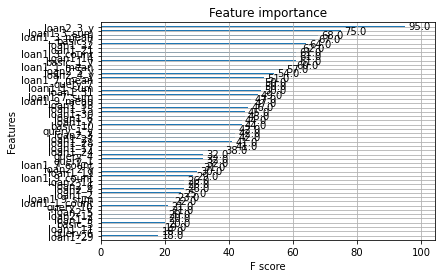

In [104]:
pic=xgb.plot_importance(best_bst,max_num_features=50)
temp=pic.get_ymajorticklabels()
important_x=[str(i).split("\'")[1] for i in temp]
important_x.reverse()

In [105]:
important_x

['loan2_3_y',
 'loan1_3_sum',
 'loan1_3_mean',
 'basic_7',
 'loan1_32',
 'loan1_21',
 'loan1_3_count',
 'loan1_14',
 'basic_1_y',
 'loan1_1_mean',
 'loan2_5_y',
 'loan2_4_y',
 'loan1_7_mean',
 'query_7',
 'loan1_1_sum',
 'loan1_31',
 'loan1_7_sum',
 'loan1_9_mean',
 'loan1_33',
 'loan1_15',
 'loan1_30',
 'loan1_6',
 'loan1_7',
 'basic_10',
 'query_1_y',
 'loan2_3',
 'loan1_27',
 'loan1_28',
 'loan1_17',
 'loan1_24',
 'query_4',
 'query_1',
 'loan1_7_count',
 'loan2_2_y',
 'loan1_19',
 'loan1_9_count',
 'loan2_11',
 'loan2_6',
 'loan2_4',
 'loan1_2',
 'loan1_9_sum',
 'loan1_1_count',
 'query_10',
 'loan2_5',
 'loan2_12',
 'loan1_3',
 'basic_5',
 'loan1_11',
 'query_6',
 'loan1_29']

In [106]:
#pd.value_counts(important_x_seq)

* basic_7:年龄
* 

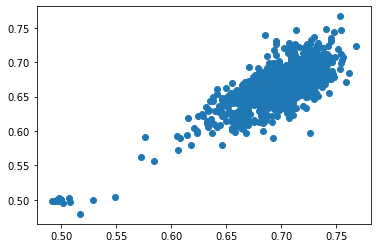

In [107]:
import matplotlib.pyplot as plt
plt.scatter(info_df['local_test_auc'],info_df['test_auc'])

# 输出模块

In [108]:
import time
import numpy as np
from sklearn.metrics import roc_auc_score

date = time.strftime("%Y%m%d-%H%M%S", time.localtime())
res_num = np.argsort([-i for i in info_df['local_test_auc']])

# 选择前n个结果进行平均（手动指定or在本地测试集排序选出）
if True:
    max_auc = -1
    list_temp = []
    for i in range(N):
        list_temp.append(local_test_labels[res_num[i]])
        temp = np.mean(list_temp, axis=0)
        temp_auc = roc_auc_score(Y_local_test, temp)
        print(i, temp_auc)
        if temp_auc > max_auc:
            max_auc = temp_auc
            n = i+1
else:
    n = 100
    n=min(N,n)

res_num = res_num[0:n]

final_pred_label = np.mean([pred_labels[i] for i in res_num], axis=0)
#local_auc = roc_auc_score(y_test, final_pred_label)
print("本地测试集前", n, "个auc为", [list(info_df['local_test_auc'])[i] for i in res_num], sep="")
print("平均之后AUC为",max_auc,sep="")

res = pd.DataFrame({
    'cust_id': list(df_test["cust_id"]),
    'label': final_pred_label,
})
res.to_csv("./output/result"+date+".csv", encoding="utf-8", index=False)


0 0.7681388272061848
1 0.7785640266469283
2 0.7826498889711325
3 0.7815083477259643
4 0.7794522575869727
5 0.7800213833374455
6 0.7784982317624805
7 0.7794917345176412
8 0.7800049346163335
9 0.7828275351591413
10 0.7829328069742577
11 0.7837453737971872
12 0.7819360144748746
13 0.7839427584505304
14 0.7844691175261124
15 0.7843210790361049
16 0.7840776379636484
17 0.7835183814458427
18 0.7841401431038737
19 0.7835710173534007
20 0.7841631713134304
21 0.7844197713627765
22 0.7841335636154289
23 0.7850020560901391
24 0.7844888559914467
25 0.7842388354305454
26 0.7842190969652109
27 0.7839263097294186
28 0.783709186610741
29 0.783172958302492
30 0.7820807632206597
31 0.7813208323052883
32 0.7814162348877375
33 0.7816465169833045
34 0.7816234887737478
35 0.7813899169339584
36 0.7813899169339583
37 0.7810379143021631
38 0.7807813142528168
39 0.7803207500616827
40 0.7800707295007815
41 0.7801595525947856
42 0.7800674397565589
43 0.7790903857225101
44 0.7790213010938398
45 0.7788502343942758


# 一些tips

* 提升n有一定提升(如何确定n？)
  * n=40 0.6763
  * n=10 0.6728
  * n=100 0.6774
  * 太大也不好

# 一些进展

* 随机参数
* XGB模型
* 本地测试集auc较高（0.75+）
* 部分类型变量进行了one-hot处理
* 把细分表除了loan与主表合并

# tbd

* 处理细分表的loan，给出指标
* 确定变量类型，以便对所有（or重要）分类变量进行one-hot处理
* 新模型？

## 10-12
* 0.6824（这次我留了代码\doge）
* 把-99变为-1，本地有提升
* 划出了一个本地测试集
  * 本地测试集（固定）d_localtest
  * 训练集（固定）
    * 评估集（每次的模型不同）dtest
    * 真正的训练集（每次的模型不同）dtrain
* 添加参数nan_num（然并卵）
* tbd
  * 找特征
  * 加x
  * 分析一下参数作用